# Creating Cohorts of Songs

# Project  Scenario:
The customer always looks forward to specialized treatment, whether shopping on
an e-commerce website or watching Netflix. The customer desires content that
aligns with their preferences. To maintain customer engagement, companies must
consistently provide the most relevant information.
Starting with Spotify, a Swedish audio streaming and media service provider, boasts
over 456 million active monthly users, including more than 195 million paid
subscribers as of September 2022. The company aims to create cohorts of different
songs to enhance song recommendations. These cohorts will be based on various
relevant features, ensuring that each group contains similar types of songs.

# Project Objective:
- Perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

# Data Description:
The dataset comprises information from Spotify's API regarding all albums by the
Rolling Stones available on Spotify. It's crucial to highlight that each song possesses
a unique ID.

# InitialData inspection and data cleaning

In [226]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [227]:
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [228]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  
0  118.001   0.0302          33        48640  
1  131.455   0.3180          34       253173  
2  130.066   0.3130          34       263160  
3  132.994   0.1470          32       305880  
4  130.533   0.2060          32       305106

In [229]:
df.shape

(1610, 17)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [231]:
df.describe()

track_number  acousticness  danceability       energy  \
count   1610.000000   1610.000000   1610.000000  1610.000000   
mean       8.613665      0.250475      0.468860     0.792352   
std        6.560220      0.227397      0.141775     0.179886   
min        1.000000      0.000009      0.104000     0.141000   
25%        4.000000      0.058350      0.362250     0.674000   
50%        7.000000      0.183000      0.458000     0.848500   
75%       11.000000      0.403750      0.578000     0.945000   
max       47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.233483   
min            0.000000     0.02190   -24.408000     0.023200    46.525000   
25%            0.000219     0.15300    -8.982500     0.036500   107.390750   
50%            0.013750     0.37950    -6.523000     0.051200   124.404500   
75%            0.179000     0.89375    -4.608750     0.086600   142.355750   
max            0.996000     0.99800    -1.014000     0.624000   216.304000   

           valence   popularity    duration_ms  
count  1610.000000  1610.000000    1610.000000  
mean      0.582165    20.788199  257736.488199  
std       0.231253    12.426859  108333.474920  
min       0.000000     0.000000   21000.000000  
25%       0.404250    13.000000  190613.000000  
50%       0.583000    20.000000  243093.000000  
75%       0.778000    27.000000  295319.750000  
max       0.974000    80.000000  981866.000000

Reviewing the min/max values for the numeric variables acousticness, danceability, energy, instrumentalness, liveness, speechiness and valence against the data dictionary, we see that the actual range in the dataset is between 0 and 1. The loudness variable is within the prescribed range of -60 to 0.

In [232]:
df.isnull().sum()


name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [233]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from release_date
df['release_year'] = df['release_date'].dt.year
df

name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoRfarYRvGTU   
2                3  1Lu761pZ0dBTGpzxaQoZNW   
3                4  1agTQzOTUnGNggyckEqiDH   
4                5  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  release_year  
0      0.0302          33        48640          2022  
1      0.3180          34       253173          2022  
2      0.3130          34       263160          2022  
3      0.1470          32       305880          2022  
4      0.2060          32       305106          2022  
...       ...         ...          ...           ...  
1605   0.9670          39       154080          1964  
1606   0.4460          36       245266          1964  
1607   0.8350          30       176080          1964  
1608   0.5320          27       121680          1964  
1609   0.9690          35       189186          1964  

[1610 rows x 18 columns]

# EDA

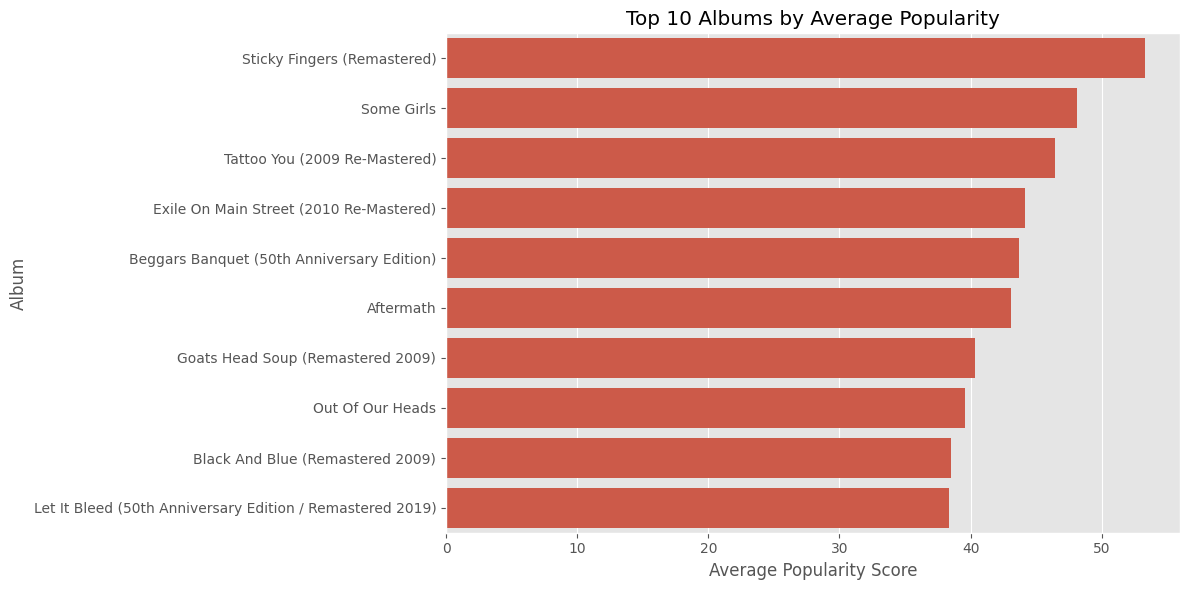

In [234]:
# Calculate average popularity by album
avg_popularity = df.groupby('album')['popularity'].mean().nlargest(10)

# Create bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_popularity.values, y=avg_popularity.index)
plt.title('Top 10 Albums by Average Popularity')
plt.xlabel('Average Popularity Score')
plt.ylabel('Album')
plt.tight_layout()
plt.show()


In [235]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_corr = df[numeric_cols].corr()
df_corr

track_number  acousticness  danceability    energy  \
track_number          1.000000     -0.035675     -0.112004  0.096314   
acousticness         -0.035675      1.000000      0.070017 -0.363819   
danceability         -0.112004      0.070017      1.000000 -0.300536   
energy                0.096314     -0.363819     -0.300536  1.000000   
instrumentalness     -0.002772      0.061403     -0.031812  0.120261   
liveness              0.188351     -0.117739     -0.516387  0.511188   
loudness              0.100835     -0.237083     -0.249406  0.698039   
speechiness           0.040617     -0.021774     -0.322684  0.417214   
tempo                -0.023934     -0.171003     -0.324398  0.201885   
valence              -0.104567     -0.138803      0.546210  0.046217   
popularity           -0.145115      0.108046      0.141205 -0.057272   
duration_ms           0.156455      0.039128     -0.220045  0.148876   
release_year          0.362922     -0.161193     -0.353826  0.404659   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
track_number             -0.002772  0.188351  0.100835     0.040617 -0.023934   
acousticness              0.061403 -0.117739 -0.237083    -0.021774 -0.171003   
danceability             -0.031812 -0.516387 -0.249406    -0.322684 -0.324398   
energy                    0.120261  0.511188  0.698039     0.417214  0.201885   
instrumentalness          1.000000  0.008873  0.012524     0.009586  0.010961   
liveness                  0.008873  1.000000  0.327036     0.400018  0.108855   
loudness                  0.012524  0.327036  1.000000     0.189904  0.112837   
speechiness               0.009586  0.400018  0.189904     1.000000  0.192687   
tempo                     0.010961  0.108855  0.112837     0.192687  1.000000   
valence                   0.103480 -0.347451 -0.027571    -0.399751  0.000558   
popularity               -0.010612 -0.205845  0.156323    -0.136745 -0.061061   
duration_ms              -0.137599  0.304735  0.221558     0.114546  0.001465   
release_year             -0.062964  0.518306  0.399270     0.306888  0.030876   

                   valence  popularity  duration_ms  release_year  
track_number     -0.104567   -0.145115     0.156455      0.362922  
acousticness     -0.138803    0.108046     0.039128     -0.161193  
danceability      0.546210    0.141205    -0.220045     -0.353826  
energy            0.046217   -0.057272     0.148876      0.404659  
instrumentalness  0.103480   -0.010612    -0.137599     -0.062964  
liveness         -0.347451   -0.205845     0.304735      0.518306  
loudness         -0.027571    0.156323     0.221558      0.399270  
speechiness      -0.399751   -0.136745     0.114546      0.306888  
tempo             0.000558   -0.061061     0.001465      0.030876  
valence           1.000000    0.065333    -0.244833     -0.300661  
popularity        0.065333    1.000000     0.074102     -0.081648  
duration_ms      -0.244833    0.074102     1.000000      0.300066  
release_year     -0.300661   -0.081648     0.300066      1.000000

<Axes: >

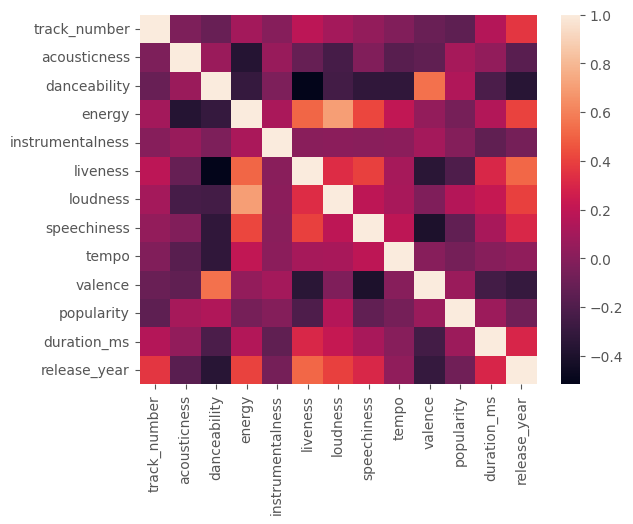

In [236]:
sns.heatmap(df_corr)

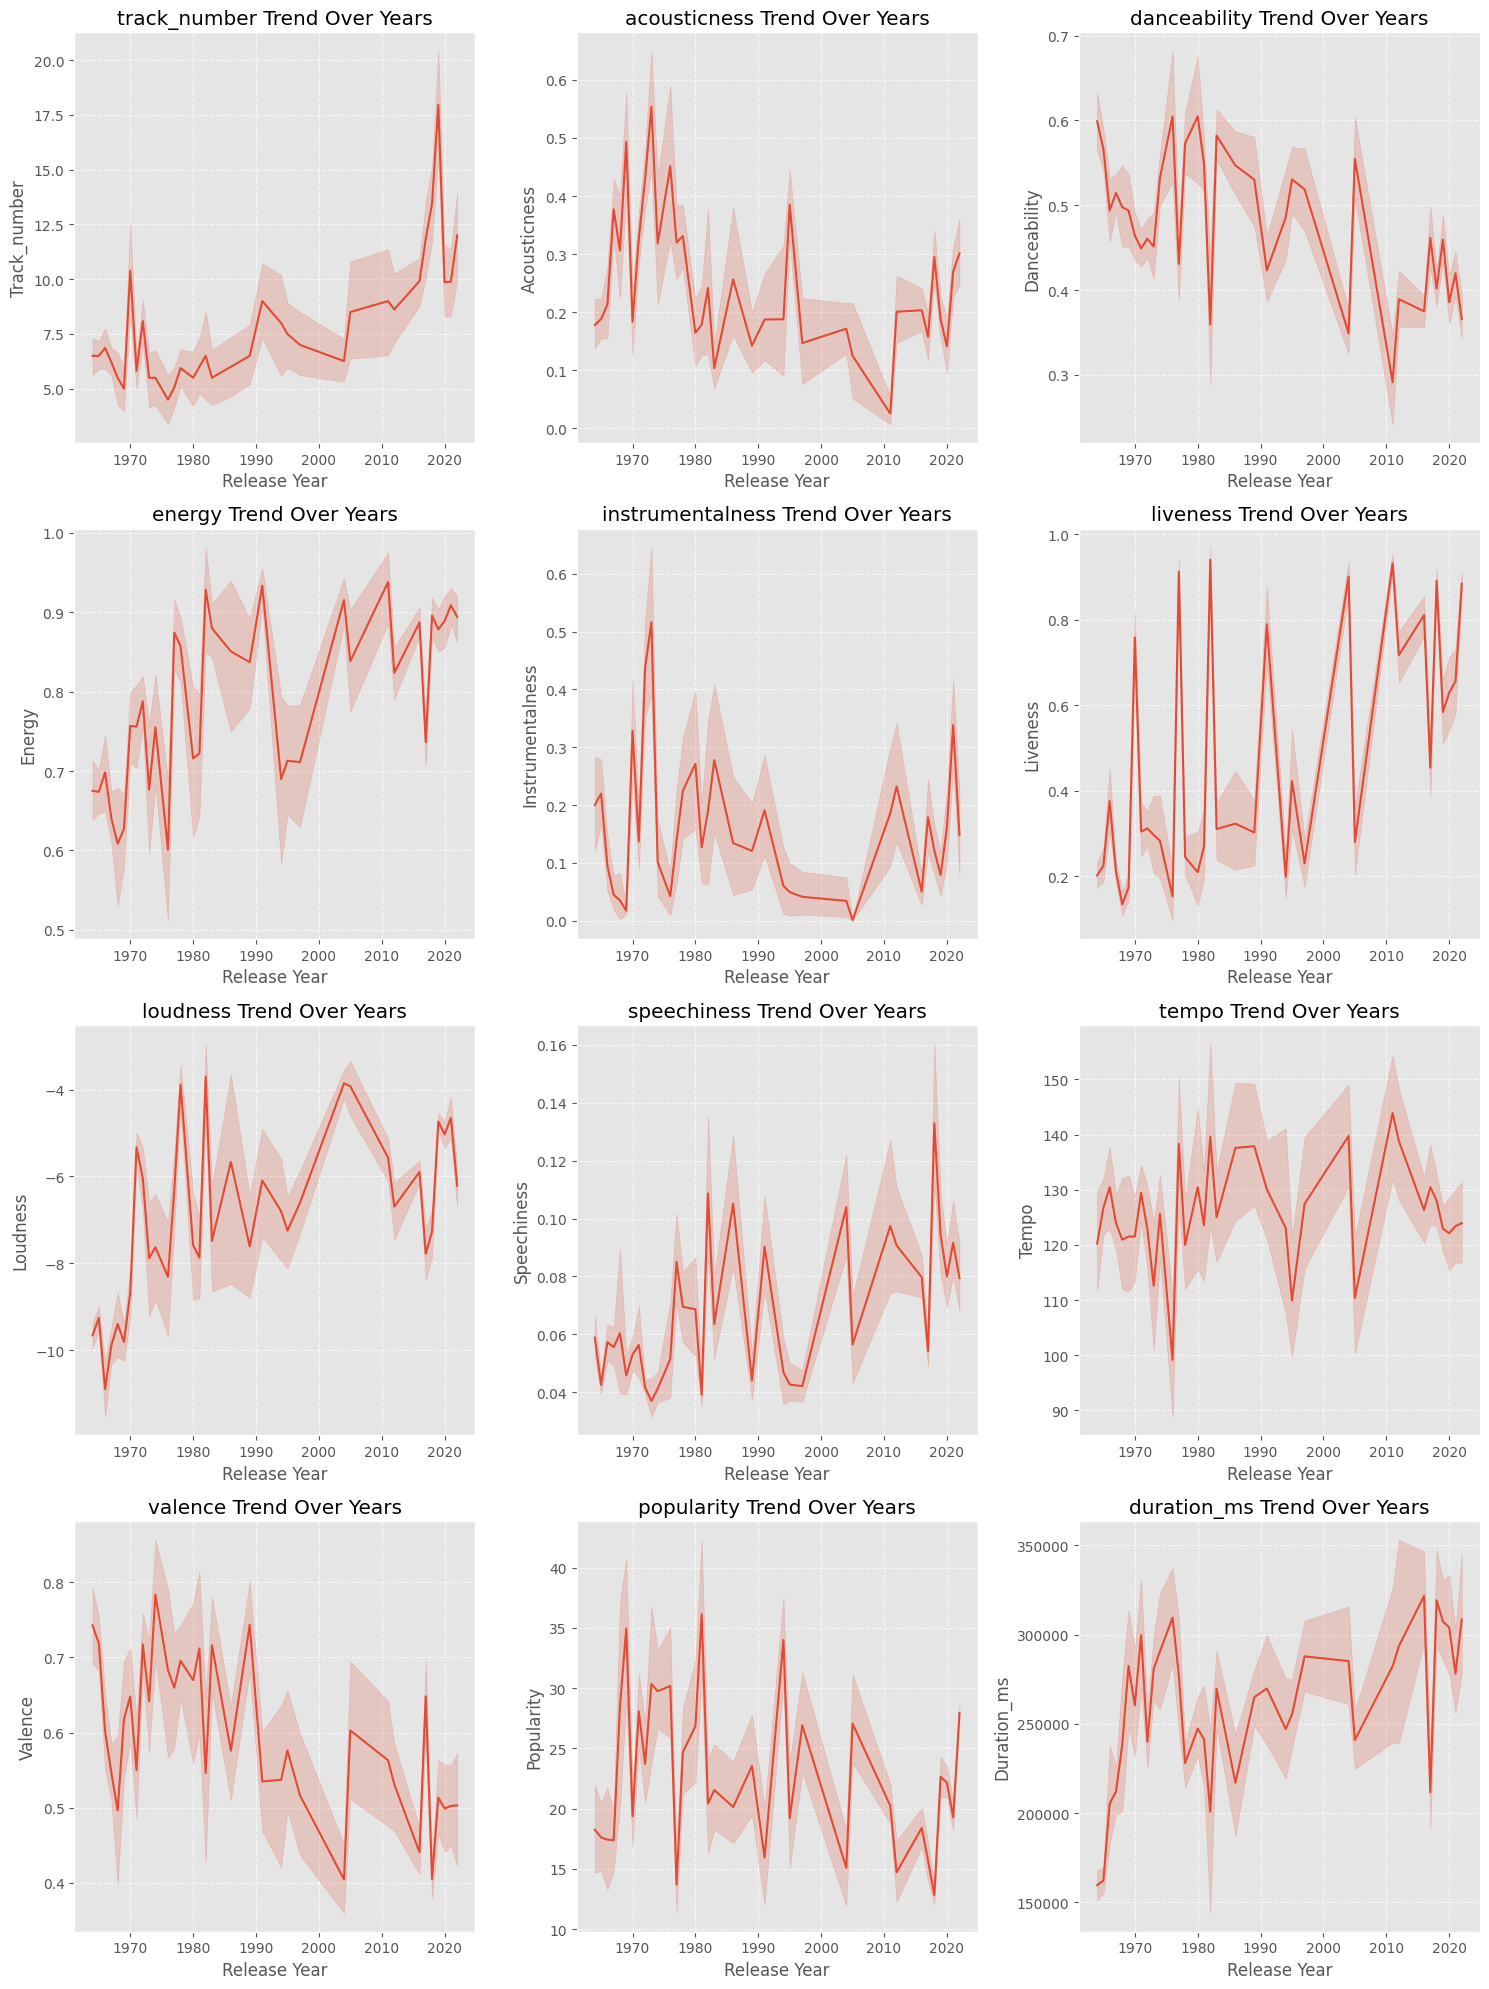

In [237]:
# Create line plots for each numeric feature vs release year
numeric_features = [col for col in numeric_cols if col != 'release_year']
n_features = len(numeric_features)
n_rows = (n_features + 2) // 3  # Calculate number of rows needed (3 columns)

plt.figure(figsize=(15, 5*n_rows))

for i, feature in enumerate(numeric_features):
    plt.subplot(n_rows, 3, i+1)
    # Use seaborn lineplot for better visualization
    sns.lineplot(data=df, x='release_year', y=feature)
    plt.title(f'{feature} Trend Over Years')
    plt.xlabel('Release Year')
    plt.ylabel(feature.capitalize())
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observation**
- Energy levels show a gradual increase since 1970, trending upwards.
- Loudness has increased over time.
- Track duration shows an overall increase from ~200,000ms to ~300,000ms with more variation recently.
- Acousticness has declined overall from ~0.4 to ~0.2, with more fluctuation in earlier years.
- Danceability remains relatively stable around 0.5 but shows slight decline in recent years.
- Tempo maintains consistency around 120-130 BPM with periodic fluctuations.
- Liveness shows increased variation in recent years, fluctuating between 0.2 and 0.8.
- Valence (musical positivity) shows a declining trend since the 1980s, dropping from ~0.7 to ~0.5.
- Popularity scores show a slight downward trend over time, varying between 15-40.

<Figure size 1200x1000 with 0 Axes>

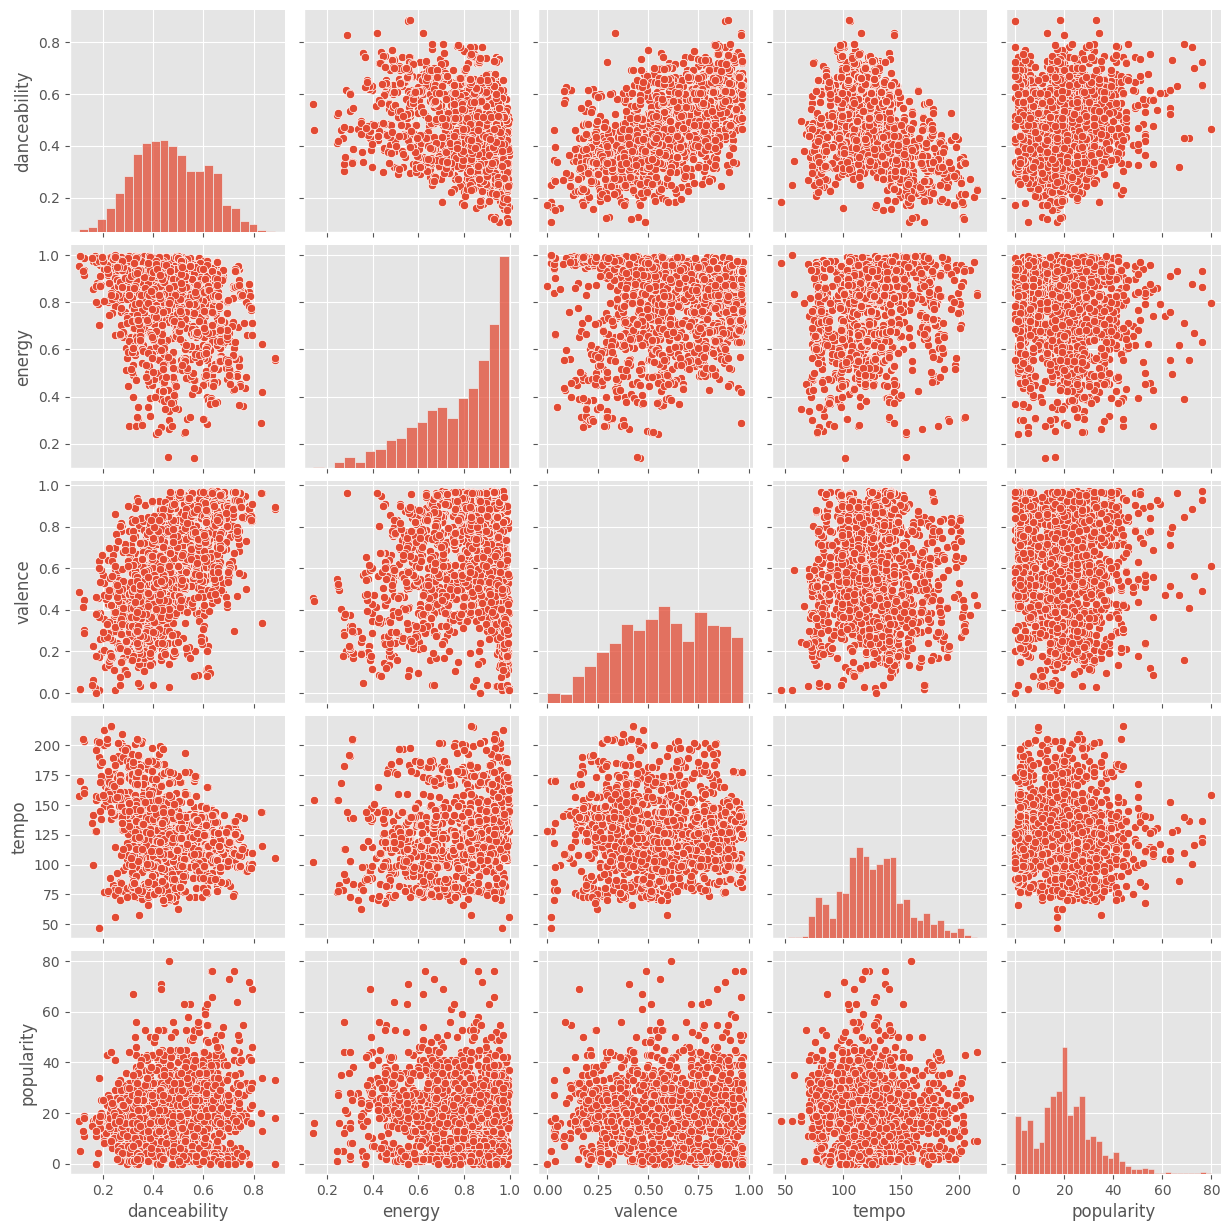

In [238]:
# Pairplot to visualize relationships between features
plt.figure(figsize=(12,10))
sns.pairplot(df[['danceability','energy', 'valence', 'tempo', 'popularity']])

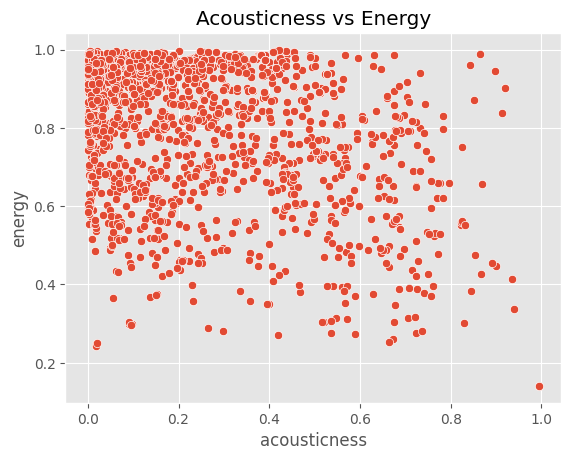

In [239]:
sns.scatterplot(x=df['acousticness'],y=df['energy'])
plt.title('Acousticness vs Energy')
plt.show()

**Observation**
- There is a clear negative correlation between acousticness and energy levels
- Most songs cluster in the high-energy (0.6-1.0) and low-acousticness (0.0-0.4) range
- Very few songs have both high acousticness (>0.6) and high energy (>0.8)
- The relationship appears to be non-linear, with energy levels dropping more steeply as acousticness increases
- This pattern suggests the Rolling Stones predominantly favor electric/amplified instruments over acoustic ones in their high-energy performances


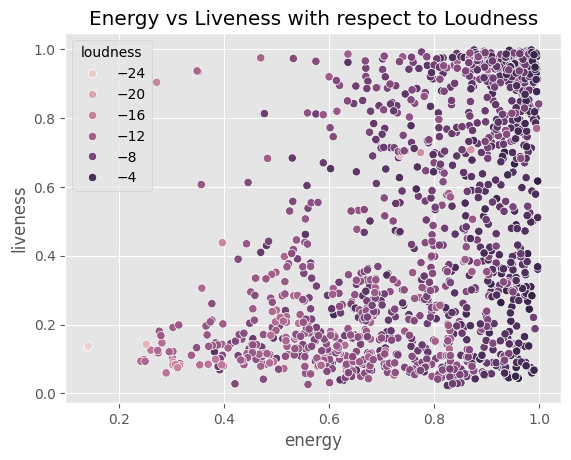

In [240]:
sns.scatterplot(x=df['energy'],y=df['liveness'],hue=df['loudness'])
plt.title('Energy vs Liveness with respect to Loudness')
plt.show()

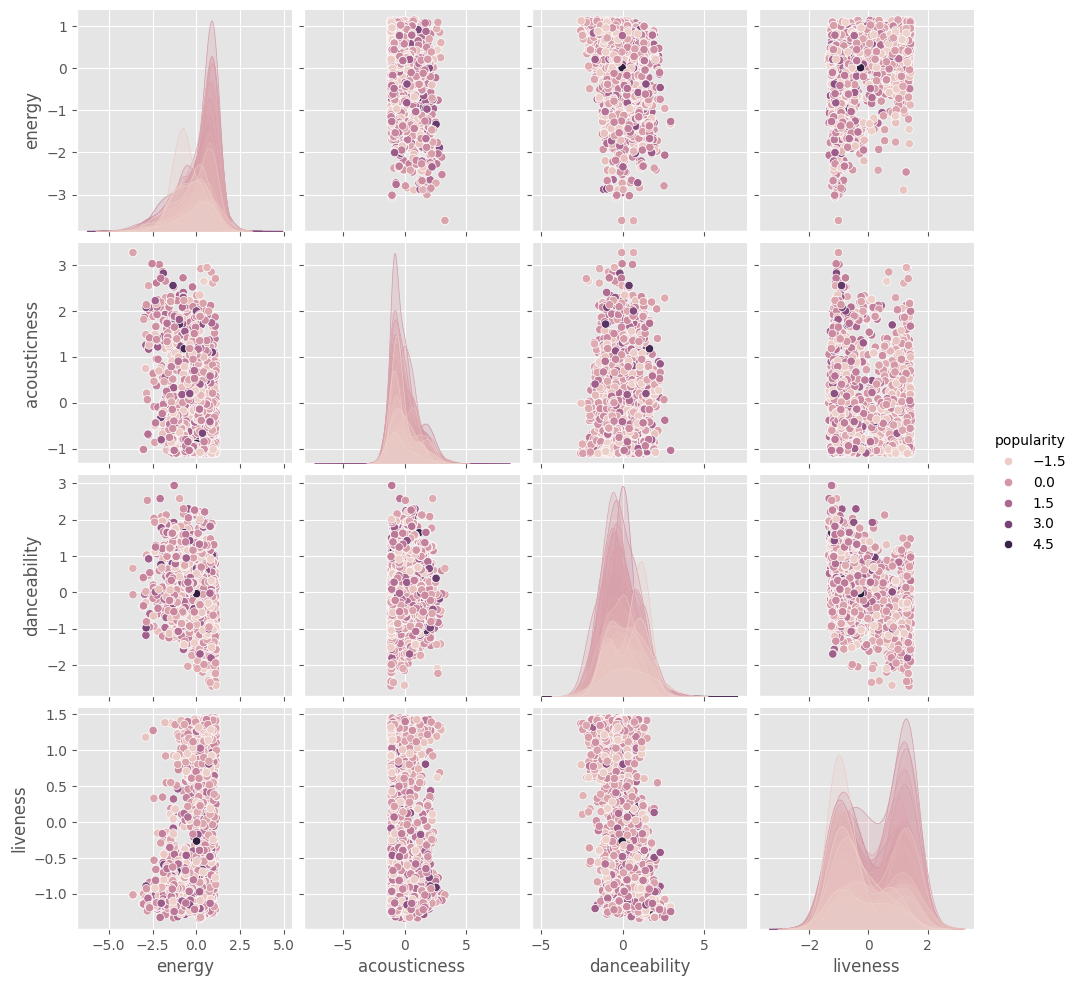

In [242]:
cols = ['energy', 'acousticness','danceability','liveness']
sns.pairplot(df,vars=cols,hue='popularity')
plt.show()

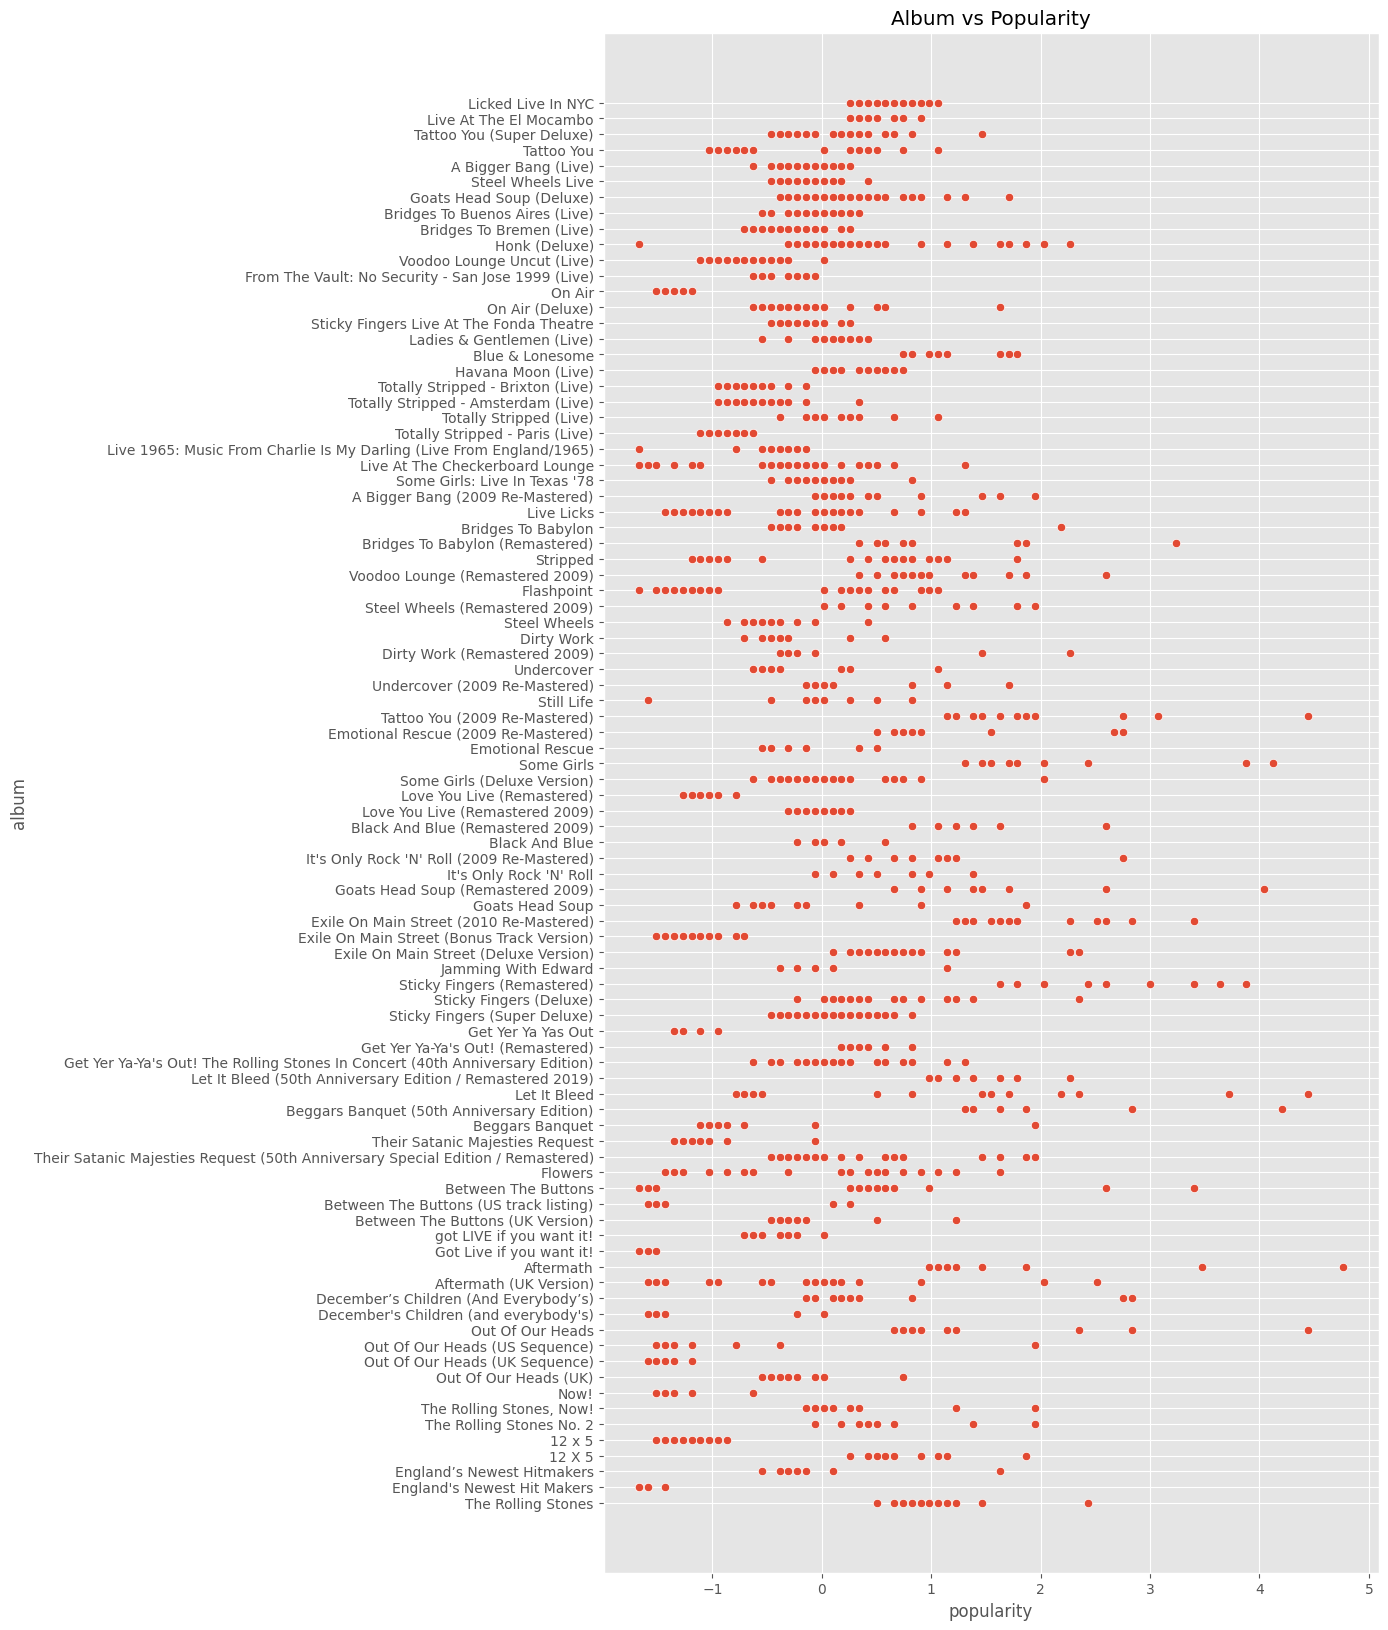

In [243]:
plt.figure(figsize=(10,20))
sns.scatterplot(y=df['album'],x=df['popularity'])
plt.title('Album vs Popularity')
plt.show()

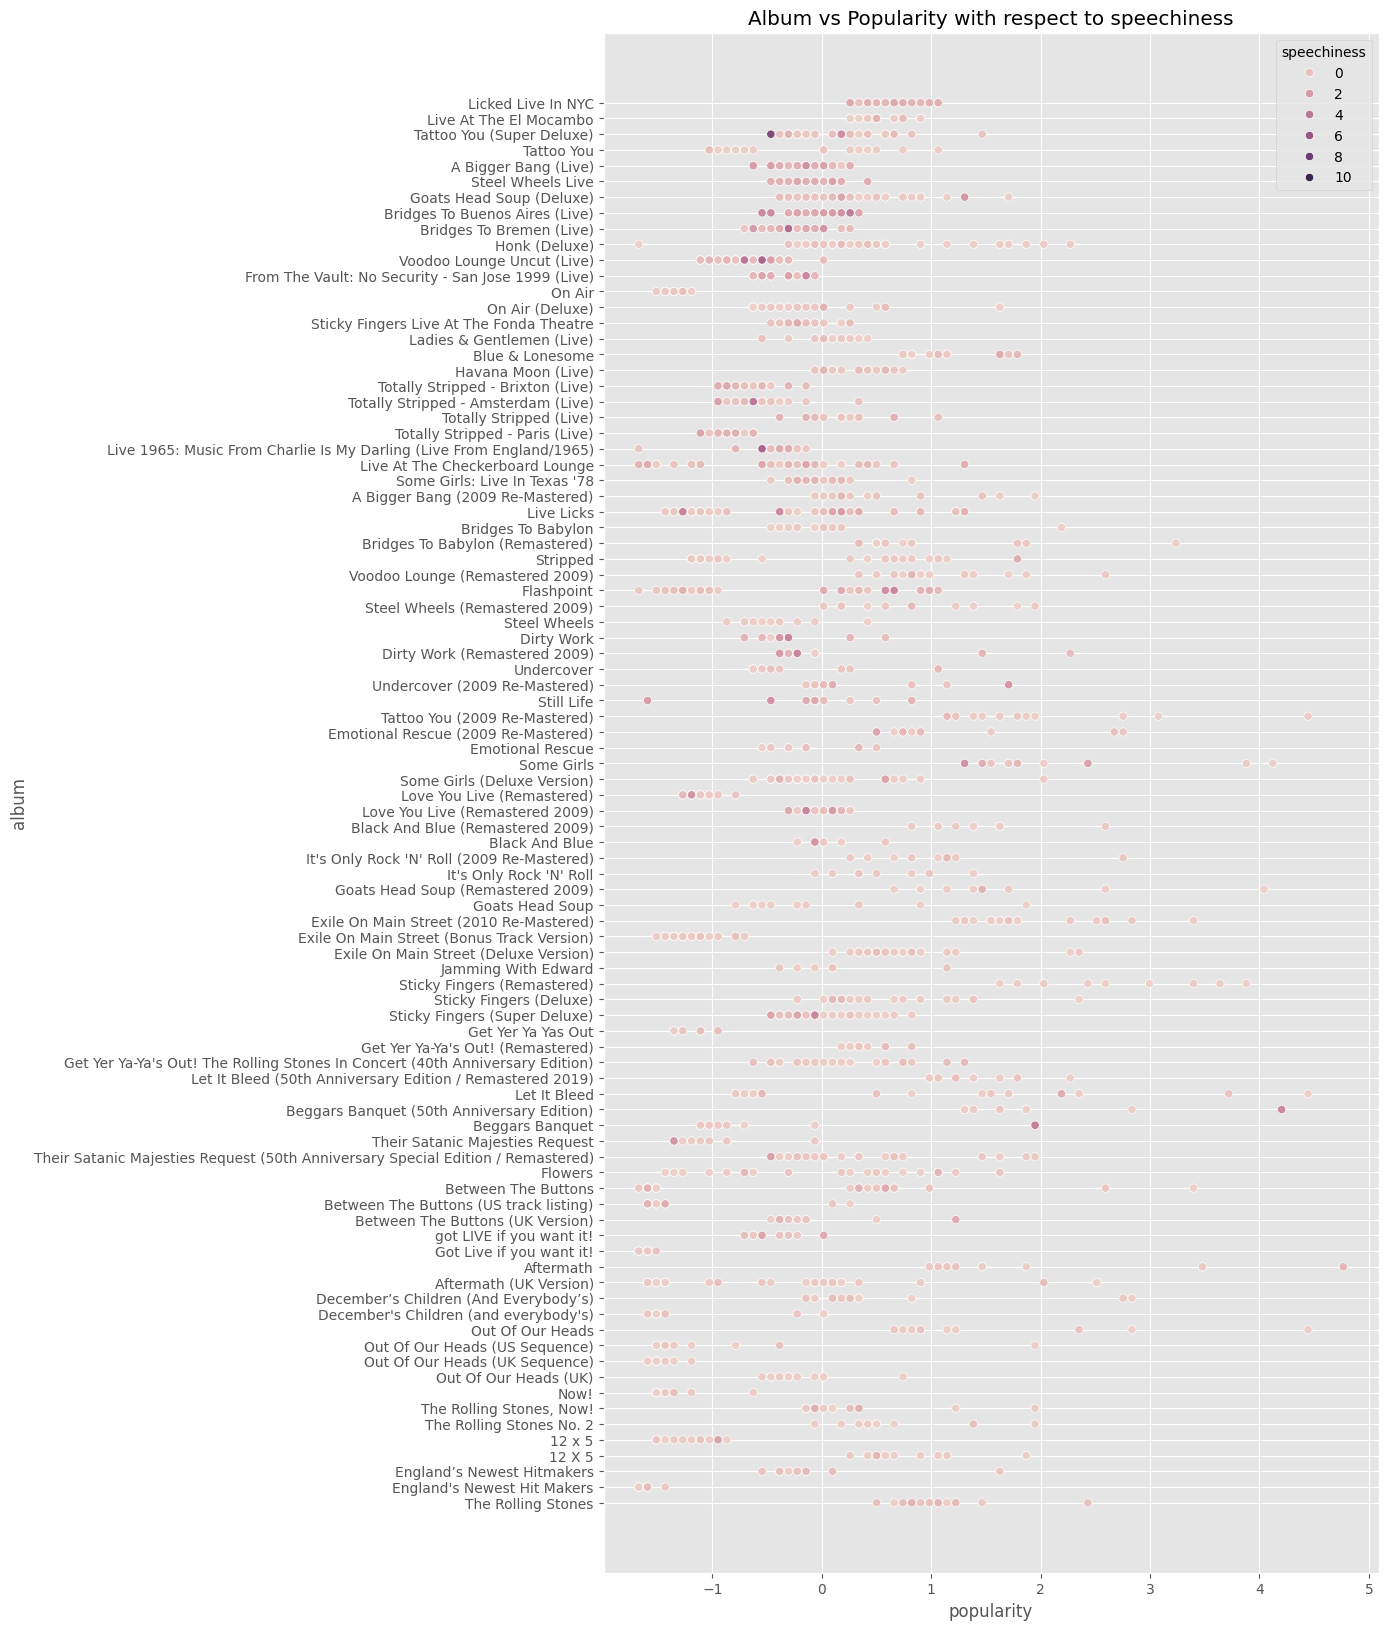

In [247]:
plt.figure(figsize=(10,20))
sns.scatterplot(y=df['album'],x=df['popularity'],hue=df['speechiness'])
plt.title('Album vs Popularity with respect to speechiness')
plt.show()

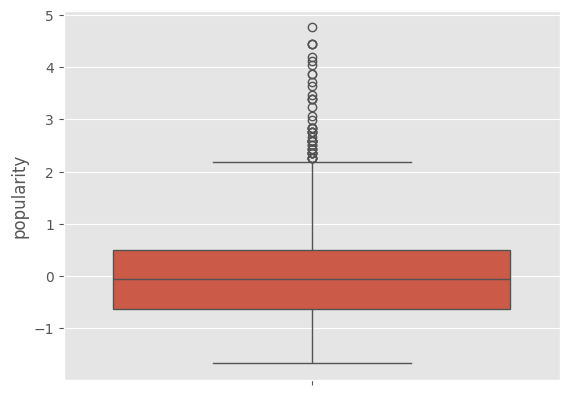

In [248]:
sns.boxplot(df['popularity'])
plt.show()

In [250]:
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10     -1.160941   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10     -1.008460   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10     -0.855979   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10     -0.703497   
4            Don’t Stop - Live  Licked Live In NYC   2022-06-10     -0.551016   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT     -0.739355   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU      0.820518   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW      0.728140   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH      1.392383   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw      0.657756   

   danceability    energy  instrumentalness  liveness  loudness  speechiness  \
0     -0.041343  1.115764          3.012099  1.261552 -1.985045     0.784410   
1     -1.007963  0.960062          0.249238  1.344648  0.724545     0.123753   
2     -0.584626  0.982305          0.853953  1.330321  0.680109     0.881280   
3     -0.704571  1.071278         -0.594080  1.155532  0.479980     2.392459   
4     -1.170242  0.982305         -0.392050  1.358975  0.625984     0.455050   

      tempo   valence  popularity  duration_ms  release_year  
0 -0.276517 -2.387590    0.982999    -1.930719       1.34862  
1  0.183852 -1.142678    1.063495    -0.042138       1.34862  
2  0.136323 -1.164306    1.063495     0.050079       1.34862  
3  0.236514 -1.882359    0.902504     0.444539       1.34862  
4  0.152303 -1.627147    0.902504     0.437392       1.34862

In [251]:
X = df.drop(['name','release_date','id','uri'],axis=1)
X

album  track_number  acousticness  danceability    energy  \
0     Licked Live In NYC     -1.160941     -0.739355     -0.041343  1.115764   
1     Licked Live In NYC     -1.008460      0.820518     -1.007963  0.960062   
2     Licked Live In NYC     -0.855979      0.728140     -0.584626  0.982305   
3     Licked Live In NYC     -0.703497      1.392383     -0.704571  1.071278   
4     Licked Live In NYC     -0.551016      0.657756     -1.170242  0.982305   
...                  ...           ...           ...           ...       ...   
1605  The Rolling Stones     -0.093572     -0.411192     -0.020176  0.776555   
1606  The Rolling Stones      0.058909     -0.848449      0.283215 -0.480188   
1607  The Rolling Stones      0.211390      0.530186      2.265844 -0.102053   
1608  The Rolling Stones      0.363871     -0.147254      1.630838 -1.369917   
1609  The Rolling Stones      0.516353      0.582974      1.821340  0.787676   

      instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0             3.012099  1.261552 -1.985045     0.784410 -0.276517 -2.387590   
1             0.249238  1.344648  0.724545     0.123753  0.183852 -1.142678   
2             0.853953  1.330321  0.680109     0.881280  0.136323 -1.164306   
3            -0.594080  1.155532  0.479980     2.392459  0.236514 -1.882359   
4            -0.392050  1.358975  0.625984     0.455050  0.152303 -1.627147   
...                ...       ...       ...          ...       ...       ...   
1605         -0.572125 -0.480613 -0.749192    -0.515591  1.753944  1.664646   
1606         -0.594461  0.069544 -0.820356     0.286496 -0.139166 -0.588999   
1607         -0.594467 -1.217308 -0.330558     0.048195 -0.993931  1.093665   
1608         -0.594213 -0.933346 -0.867131    -0.141672 -0.802344 -0.216997   
1609         -0.346425 -1.132492 -0.468210    -0.651210 -0.027615  1.673297   

      popularity  duration_ms  release_year  
0       0.982999    -1.930719      1.348620  
1       1.063495    -0.042138      1.348620  
2       1.063495     0.050079      1.348620  
3       0.902504     0.444539      1.348620  
4       0.902504     0.437392      1.348620  
...          ...          ...           ...  
1605    1.465975    -0.957125     -1.236819  
1606    1.224487    -0.115148     -1.236819  
1607    0.741512    -0.753985     -1.236819  
1608    0.500024    -1.256295     -1.236819  
1609    1.143991    -0.632970     -1.236819  

[1610 rows x 14 columns]

In [241]:
from sklearn.decomposition import PCA

df_original = df.copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])
df[numeric_cols] = scaled_features
df

name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0        -1.160941  2IEkywLJ4ykbhi1yRQvmsT   
1        -1.008460  6GVgVJBKkGJoRfarYRvGTU   
2        -0.855979  1Lu761pZ0dBTGpzxaQoZNW   
3        -0.703497  1agTQzOTUnGNggyckEqiDH   
4        -0.551016  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605     -0.093572  08l7M5UpRnffGl0FyuRiQZ   
1606      0.058909  3JZllQBsTM6WwoJdzFDLhx   
1607      0.211390  0t2qvfSBQ3Y08lzRRoVTdb   
1608      0.363871  5ivIs5vwSj0RChOIvlY3On   
1609      0.516353  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT     -0.739355     -0.041343   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU      0.820518     -1.007963   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW      0.728140     -0.584626   
3     spotify:track:1agTQzOTUnGNggyckEqiDH      1.392383     -0.704571   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw      0.657756     -1.170242   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ     -0.411192     -0.020176   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx     -0.848449      0.283215   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb      0.530186      2.265844   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On     -0.147254      1.630838   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70      0.582974      1.821340   

        energy  instrumentalness  liveness  loudness  speechiness     tempo  \
0     1.115764          3.012099  1.261552 -1.985045     0.784410 -0.276517   
1     0.960062          0.249238  1.344648  0.724545     0.123753  0.183852   
2     0.982305          0.853953  1.330321  0.680109     0.881280  0.136323   
3     1.071278         -0.594080  1.155532  0.479980     2.392459  0.236514   
4     0.982305         -0.392050  1.358975  0.625984     0.455050  0.152303   
...        ...               ...       ...       ...          ...       ...   
1605  0.776555         -0.572125 -0.480613 -0.749192    -0.515591  1.753944   
1606 -0.480188         -0.594461  0.069544 -0.820356     0.286496 -0.139166   
1607 -0.102053         -0.594467 -1.217308 -0.330558     0.048195 -0.993931   
1608 -1.369917         -0.594213 -0.933346 -0.867131    -0.141672 -0.802344   
1609  0.787676         -0.346425 -1.132492 -0.468210    -0.651210 -0.027615   

       valence  popularity  duration_ms  release_year  
0    -2.387590    0.982999    -1.930719      1.348620  
1    -1.142678    1.063495    -0.042138      1.348620  
2    -1.164306    1.063495     0.050079      1.348620  
3    -1.882359    0.902504     0.444539      1.348620  
4    -1.627147    0.902504     0.437392      1.348620  
...        ...         ...          ...           ...  
1605  1.664646    1.465975    -0.957125     -1.236819  
1606 -0.588999    1.224487    -0.115148     -1.236819  
1607  1.093665    0.741512    -0.753985     -1.236819  
1608 -0.216997    0.500024    -1.256295     -1.236819  
1609  1.673297    1.143991    -0.632970     -1.236819  

[1610 rows x 18 columns]

In [61]:
# # Remove outliers based on Z-score
# df = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]

In [215]:
# Apply PCA
n_components=10
pca = PCA(n_components=n_components)
principal_components = pca.fit(scaled_features)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}')

# calculate the running total variance aka cumulative variance
pca_evr_cumsum = np.cumsum(explained_variance)
df_pca_evr = pd.DataFrame({'Principal Component':range(1,n_components+1),
                           'PC EVR': explained_variance,
                           'PC EVR CumSum': pca_evr_cumsum,
                           })
df_pca_evr['n_components'] = df_pca_evr.index + 1
df_pca_evr

Explained Variance: [0.2709949  0.12826341 0.10142203 0.09073263 0.08186327 0.06725295
 0.05598617 0.05422169 0.04504457 0.03700715]


Principal Component    PC EVR  PC EVR CumSum  n_components
0                    1  0.270995       0.270995             1
1                    2  0.128263       0.399258             2
2                    3  0.101422       0.500680             3
3                    4  0.090733       0.591413             4
4                    5  0.081863       0.673276             5
5                    6  0.067253       0.740529             6
6                    7  0.055986       0.796515             7
7                    8  0.054222       0.850737             8
8                    9  0.045045       0.895782             9
9                   10  0.037007       0.932789            10

Text(0, 0.5, 'Explained Variance Ratio (CumSum)')

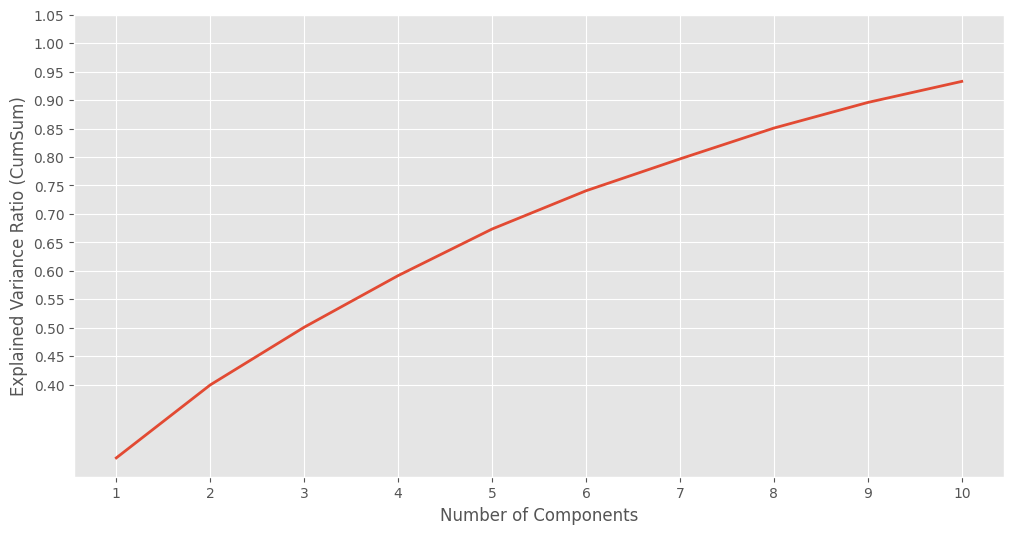

In [216]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))

plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PC EVR CumSum'], linewidth=2)
plt.xticks(df_pca_evr['Principal Component'])
plt.yticks(np.arange(0.4,1.1,.05))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio (CumSum)')

Text(0, 0.5, 'Explained Variance Ratio')

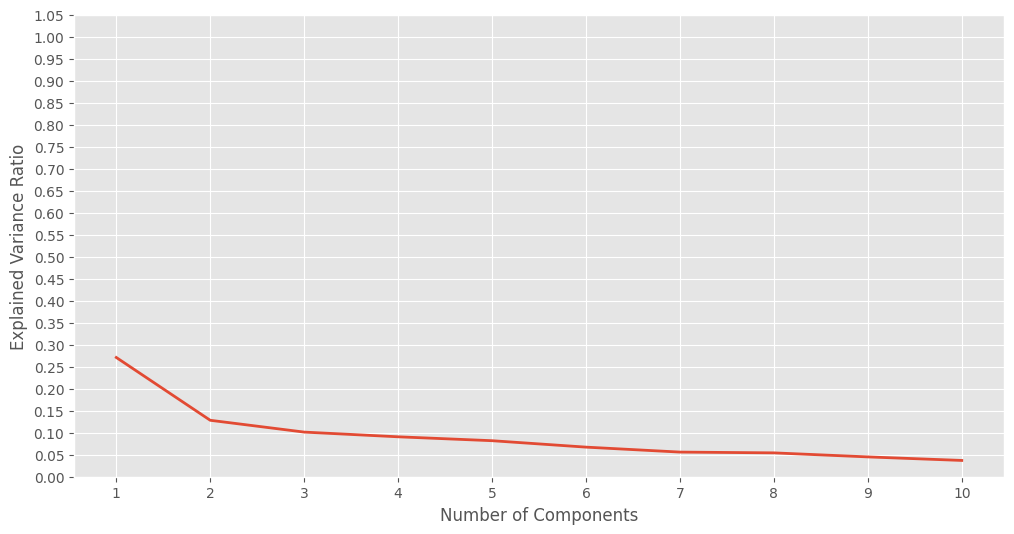

In [224]:
plt.figure(figsize=(12,6))

plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PC EVR'], linewidth=2)
plt.xticks(df_pca_evr['Principal Component'])
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

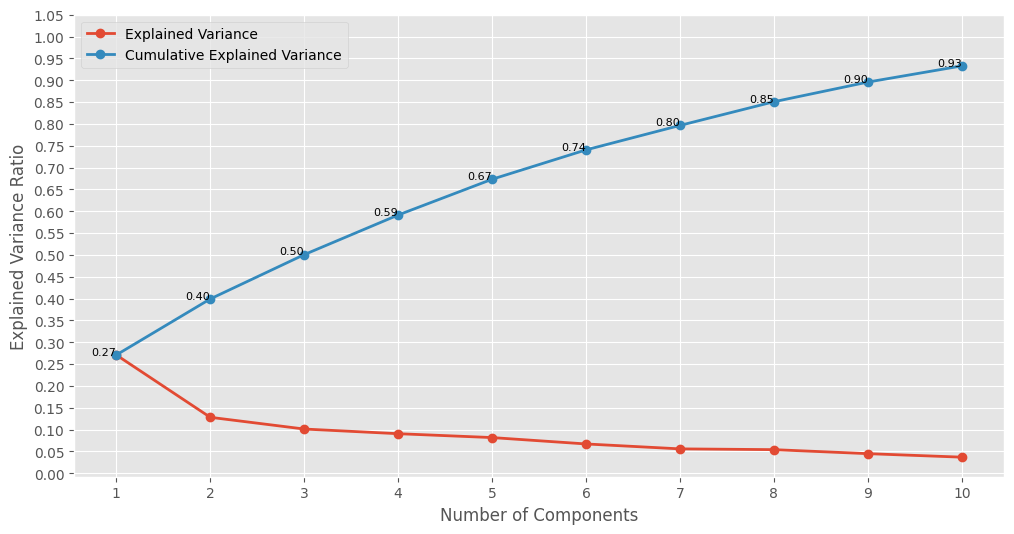

In [225]:
# Plot the explained variance
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))

plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PC EVR'], linewidth=2, marker='o', label='Explained Variance')
plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PC EVR CumSum'], linewidth=2, marker='o', label='Cumulative Explained Variance')
plt.xticks(df_pca_evr['Principal Component'])
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

# add labels to the cumulative variance points
for i, txt in enumerate(df_pca_evr['PC EVR CumSum']):
    txt = "{:.2f}".format(txt)
    plt.annotate(txt, (df_pca_evr['Principal Component'][i], df_pca_evr['PC EVR CumSum'][i]), fontsize=8, ha='right')

plt.legend()
plt.grid(True)
plt.show()